In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float 

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)



In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine) 

In [10]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Climate Analysis

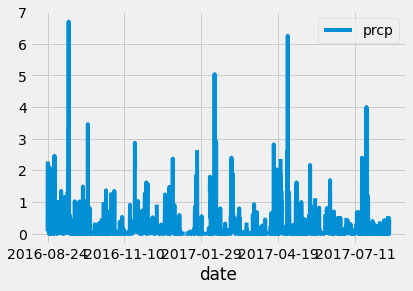

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
# last_date
# year_ago
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,
      Measurement.prcp]
data = session.query(*sel).filter(func.strftime(Measurement.date) > year_ago).order_by(Measurement.date).all()
# data
# Save the query results as a Pandas DataFrame
df = pd.DataFrame(data)

# Sort the dataframe by date
df = df.sort_values(by=['date'])

# Set the index to the date column
df = df.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.line()

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.agg({'prcp':['min', 'max', 'median', 'mean', 'skew']})

,prcp
min,0.000000
max,6.700000
median,0.020000
mean,0.176462
skew,5.890936


In [28]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
station_count

9

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).all()
# active_stations
stations_df = pd.DataFrame(active_stations, columns=['station','prcp'])
stations_df = stations_df.sort_values(by=['prcp'])
stations_df

,station,prcp
5,USC00518838,342
4,USC00517948,683
0,USC00511918,1932
2,USC00514830,1937
3,USC00516128,2484
8,USC00519523,2572
7,USC00519397,2685
1,USC00513117,2696
6,USC00519281,2772


In [65]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281")
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281")
avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281")
lowest_temp = pd.DataFrame(lowest_temp, columns=['station','tobs'])
highest_temp = pd.DataFrame(highest_temp, columns=['station','tobs'])
avg_temp = pd.DataFrame(avg_temp, columns=['station','tobs'])


In [66]:
lowest_temp


,station,tobs
0,USC00519281,54.0


In [67]:
highest_temp


,station,tobs
0,USC00519281,85.0


In [68]:
avg_temp

,station,tobs
0,USC00519281,71.663781


In [69]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stations_df = pd.DataFrame(active_stations, columns=['station','tobs'])
stations_df = stations_df.sort_values(by=['tobs'])
stations_df

,station,tobs
5,USC00518838,342
4,USC00517948,683
0,USC00511918,1932
2,USC00514830,1937
3,USC00516128,2484
8,USC00519523,2572
7,USC00519397,2685
1,USC00513117,2696
6,USC00519281,2772


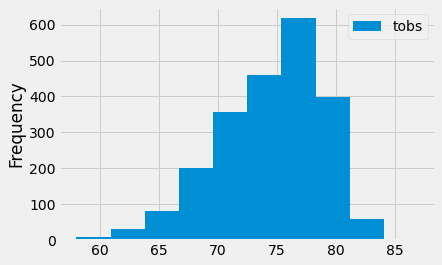

In [71]:
sel = [Measurement.date,
      Measurement.tobs]
data = session.query(*sel).filter(func.strftime(Measurement.date) > year_ago).order_by(Measurement.date).all()

df = pd.DataFrame(data)

# Sort the dataframe by date
df = df.sort_values(by=['date'])

# Set the index to the date column
df = df.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.hist()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
